In [95]:
import numpy as np
import pandas as pd
import requests
import csv
from os import path
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [96]:
url = "https://api.ce.pdn.ac.lk/projects/v1/all"
response = requests.get(url)
result = response.json()

In [97]:
#Get data from the projrct site
data = []

for category in result:
    for batch in result[category]["batches"]:

        for project in result[category]["batches"][batch]["projects"]:

            details = []
            for key, value in result[category]["batches"][batch]["projects"][project].items():
                if key == "github" or key == "cover_url" or key == "thumbnail_url":
                    continue
                details.append(value)
            data.append(details)

In [98]:
#Create a data frame
data = pd.DataFrame(data)
data = data[[0,1]]
data.columns = ["title","description"]
data.head()

,title,description
0,A GUI for controlling and supervising multiple...,The idea is to create a GUI platform where a u...
1,An Efficient System For Waste Collection,This Project aims to implement an Efficient Wa...
2,An automated system for monitoring and control...,This is a system for automatically controlling...
3,Automated Bike Sharing System,This project is about building an automated bi...
4,Automated Book Management System Automated Boo...,"In libraries, We have planned to implement a b..."


In [99]:
#Function to check irrellevant words in the description
words = ['a','is','the','an','by','and','in','to','as','there','so','do',
         'of','can','be','project','if','are']  
def checkIndex(str,words):
    for i in range(len(words)):
        if (words[i] == str):
            return True
            break
    return False        

In [100]:
#Function to remove irrelevant words
def removePrep(list):
    rem = []
    for i in range (len(list)):
        if(checkIndex(list[i],words)):
            rem.append(list[i])
    for i in range (len(rem)):
        list.remove(rem[i])  

#Function to check the existance of the sample tags
def checkTag(str):
    tags = ['gui','urban','automatically','ml','embeded','image','processing',
            'ai','artificial','automation','automated','electrical','robot','arduino','ir',
            'sensor','dc','power','inteligent','monitor','agriculture','industry','analysys',
            'data','base','iot','biology','bio','medical','dna','fire','eco','mobile','smart',
            'remotely','computer','electronic','self','driving','real','time','efficient',
            'relational','online','database','memory','pipeline','simulate','cpu','network',
            'networkinfg','python','java','c','html','graphical','graphic','prediction']
    for i in range(len(tags)):
        if (tags[i] == str):
            return True
            break
    return False          

#Function to add tags
def addTag(list):
    tags = []
    for i in range (len(list)):
        if(checkTag(list[i])):
            if not (checkIndex(list[i],tags)):
                tags.append(list[i])
    return tags

In [101]:
#Add tags
tag_data = []

for l in range (len(data)):
    li = list(str(data.description[l]).lower().split(" "))
    removePrep(li)
    tag_data.append(addTag(li))
    li.clear()

In [102]:
#Add to the data frame
data['tags'] = tag_data

In [103]:
print(tag_data)

[['gui', 'efficient'], ['efficient', 'urban'], ['automatically', 'electrical', 'automated'], ['automated'], ['robot', 'ir', 'dc', 'power'], ['time', 'sensor', 'automated'], ['automated', 'time', 'iot'], [], ['online', 'medical', 'time', 'efficient', 'data'], ['time'], ['fire'], [], ['artificial', 'agriculture'], ['urban'], [], ['monitor'], [], ['smart', 'data', 'automation'], ['automated'], ['automatically'], ['smart', 'monitor', 'data', 'urban'], ['time', 'sensor'], ['time', 'mobile', 'automated'], ['electronic', 'electrical', 'automated'], ['industry', 'monitor'], ['real', 'time'], ['medical'], [], ['network'], ['power'], [], ['real'], ['monitor', 'prediction'], [], ['smart'], ['monitor'], ['smart', 'power', 'iot', 'efficient', 'time', 'real', 'data'], ['robot'], ['monitor'], [], [], [], [], [], [], [], ['automated', 'mobile'], [], ['smart'], ['automated', 'mobile'], [], [], ['online'], [], ['online', 'medical'], ['smart', 'remotely'], ['smart'], ['smart'], [], ['time'], ['robot'], [

In [104]:
tags =  []  #Store all the tags
for i in range (len(tag_data)):
  for j in range (len(tag_data[i])):
    tags.append(tag_data[i][j])

#Get unique list of tags
uniq_tags = np.unique(tags)

In [105]:
#Get the frequencies of the tags
freq_dict = {}
for i in range (len(uniq_tags)):
  count = tags.count(uniq_tags[i])
  freq_dict[uniq_tags[i]] = count

#Sort according to the frequencies in reverse order
freq_dict_srt = sorted(freq_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse = True) 
  
print(freq_dict_srt)

[('data', 21), ('smart', 15), ('time', 13), ('automated', 13), ('online', 9), ('mobile', 9), ('monitor', 8), ('efficient', 7), ('real', 6), ('computer', 5), ('sensor', 4), ('power', 4), ('image', 4), ('database', 4), ('automatically', 4), ('urban', 3), ('robot', 3), ('prediction', 3), ('pipeline', 3), ('medical', 3), ('automation', 3), ('python', 2), ('processing', 2), ('network', 2), ('ir', 2), ('iot', 2), ('industry', 2), ('gui', 2), ('graphical', 2), ('electrical', 2), ('cpu', 2), ('remotely', 1), ('relational', 1), ('ml', 1), ('memory', 1), ('fire', 1), ('electronic', 1), ('dna', 1), ('dc', 1), ('base', 1), ('artificial', 1), ('agriculture', 1)]


In [106]:
# Convert tags in to a string
text = (" ").join(tags)
# Create the word cloud according to the frequency of tags
wordcloud = WordCloud(background_color="black").generate_from_frequencies(freq_dict)

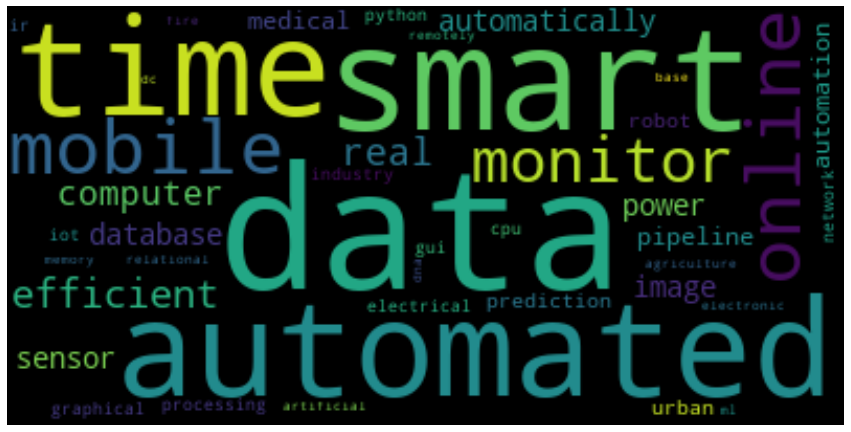

In [108]:
#Show the tag cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save as image
plt.savefig("Tag_Cloud.png", bbox_inches='tight')


plt.show()